In [1]:
from main import ChessDataset
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [4]:
ds = ChessDataset(root='./data/train')
df = [(ann["id"].item(), ann["boxes"].shape[0]) for _, ann in ds]
df = pd.DataFrame(df, columns=["id", "n_obj"])

In [5]:
df["label"] = pd.cut(
    df["n_obj"], bins=[0, 1, 7, 12, 20, 25, 31, 32], labels=list("ABCDEFG")
)
train_ix, test_ix = train_test_split(df["id"], stratify=df["label"], train_size=120)

In [10]:
X = df.loc[train_ix.index]
Y = df.loc[test_ix.index]

<AxesSubplot:>

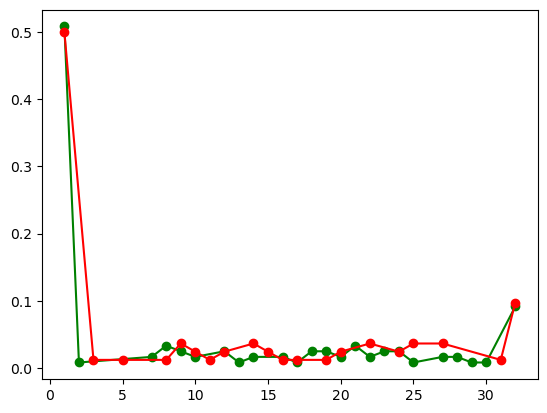

In [12]:
ax = X['n_obj'].value_counts(normalize=True).sort_index().plot(marker='o', c='g', label='train')
Y['n_obj'].value_counts(normalize=True).sort_index().plot(marker='o', c='r', label='test', ax=ax)

In [33]:
scores = pd.read_csv('chess_iou_debug_2022-09-22T09:58:22.497664.csv', skiprows=1, names=['id', 'iou'])
scores.sort_values('iou', inplace=True)
bad = scores[scores['iou'] == 0]
bad

,id,iou
33,74,0.0
77,39,0.0
24,187,0.0
14,82,0.0
12,78,0.0
44,113,0.0
48,12,0.0
47,93,0.0
6,180,0.0
69,97,0.0


In [34]:
import torch

In [35]:
model = torch.load('data/models/random.pt')